In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b91fd6d118b99170a12c5686de74770d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | stephenville
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | buraydah
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | nikolayevsk-na-amure
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | monrovia
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | karimnagar
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | masty
Processing Record 20 of Set 1 | mandera
Processing Record 21 of Set 1 | tabou
Processing Record 22 of Set 1 | adrar
Processing

Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | kitui
Processing Record 44 of Set 4 | matara
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | puerto padre
Processing Record 48 of Set 4 | muli
Processing Record 49 of Set 4 | bairiki
Processing Record 50 of Set 4 | znamenskoye
Processing Record 1 of Set 5 | mount dora
Processing Record 2 of Set 5 | makariv
Processing Record 3 of Set 5 | syracuse
Processing Record 4 of Set 5 | roald
Processing Record 5 of Set 5 | kushima
Processing Record 6 of Set 5 | yumen
Processing Record 7 of Set 5 | acapulco
Processing Record 8 of Set 5 | moron
Processing Record 9 of Set 5 | deputatskiy
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | esperance
Processing Record 12 of Set 5 | tiksi
Processing Record 13 of Set 5 | mbandaka
Processing Record 14 of Set 5 | aloleng
Processing

Processing Record 29 of Set 8 | fayaoue
Processing Record 30 of Set 8 | baker city
Processing Record 31 of Set 8 | teknaf
Processing Record 32 of Set 8 | taree
Processing Record 33 of Set 8 | dwarka
Processing Record 34 of Set 8 | kailua
Processing Record 35 of Set 8 | turtas
Processing Record 36 of Set 8 | rudnogorsk
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 8 | ugoofaaru
Processing Record 40 of Set 8 | quebec
Processing Record 41 of Set 8 | hundorp
Processing Record 42 of Set 8 | oranjemund
Processing Record 43 of Set 8 | colac
Processing Record 44 of Set 8 | lincoln
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | santa marta
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8 | tungor
Processing Record 49 of Set 8 | goderich
Processing Record 50 of Set 8 | tomatlan
Processing Record 1 of Set 9 | pitimbu
Processing Record 2 of Set 9 | kavieng
Proces

Processing Record 15 of Set 12 | tiznit
Processing Record 16 of Set 12 | samalkha
Processing Record 17 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 12 | olafsvik
Processing Record 19 of Set 12 | hauterive
Processing Record 20 of Set 12 | jacareacanga
Processing Record 21 of Set 12 | vila do maio
Processing Record 22 of Set 12 | rocha
Processing Record 23 of Set 12 | carauari
Processing Record 24 of Set 12 | qianan
Processing Record 25 of Set 12 | north bend
Processing Record 26 of Set 12 | dese
Processing Record 27 of Set 12 | vicosa
Processing Record 28 of Set 12 | piacabucu
Processing Record 29 of Set 12 | port moresby
Processing Record 30 of Set 12 | kampong thum
Processing Record 31 of Set 12 | naron
Processing Record 32 of Set 12 | maniitsoq
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | sibu
Processing Record 35 of Set 12 | alugan
Processing Record 36 of Set 12 | kaeo
Processing Record 37 of Set 12 | wagga wagga
Processing Reco

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,28.09,96,100,6.40,GL,2021-10-03 23:04:21
1,Stephenville,32.2207,-98.2023,82.53,45,40,6.91,US,2021-10-03 23:08:34
2,Bilibino,68.0546,166.4372,19.18,93,91,2.66,RU,2021-10-03 23:08:34
3,Lebu,-37.6167,-73.6500,49.57,76,0,19.95,CL,2021-10-03 23:08:35
4,Kapaa,22.0752,-159.3190,78.19,79,90,4.00,US,2021-10-03 23:04:21
5,Buraydah,26.3260,43.9750,79.74,14,10,5.91,SA,2021-10-03 23:06:23
6,Avarua,-21.2078,-159.7750,77.05,69,75,10.36,CK,2021-10-03 23:05:01
7,Geraldton,-28.7667,114.6000,48.61,87,0,8.05,AU,2021-10-03 23:08:36
8,Te Anau,-45.4167,167.7167,47.68,94,100,1.59,NZ,2021-10-03 23:05:57
9,Hithadhoo,-0.6000,73.0833,82.96,77,73,19.01,MV,2021-10-03 23:08:36


In [11]:
# Change the order of the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Assign DataFrame with new column order
city_data_df = city_data_df[new_column_order]
# Print DataFrame
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-10-03 23:04:21,77.4840,-69.3632,28.09,96,100,6.40
1,Stephenville,US,2021-10-03 23:08:34,32.2207,-98.2023,82.53,45,40,6.91
2,Bilibino,RU,2021-10-03 23:08:34,68.0546,166.4372,19.18,93,91,2.66
3,Lebu,CL,2021-10-03 23:08:35,-37.6167,-73.6500,49.57,76,0,19.95
4,Kapaa,US,2021-10-03 23:04:21,22.0752,-159.3190,78.19,79,90,4.00
5,Buraydah,SA,2021-10-03 23:06:23,26.3260,43.9750,79.74,14,10,5.91
6,Avarua,CK,2021-10-03 23:05:01,-21.2078,-159.7750,77.05,69,75,10.36
7,Geraldton,AU,2021-10-03 23:08:36,-28.7667,114.6000,48.61,87,0,8.05
8,Te Anau,NZ,2021-10-03 23:05:57,-45.4167,167.7167,47.68,94,100,1.59
9,Hithadhoo,MV,2021-10-03 23:08:36,-0.6000,73.0833,82.96,77,73,19.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

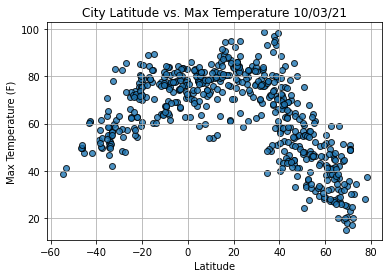

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

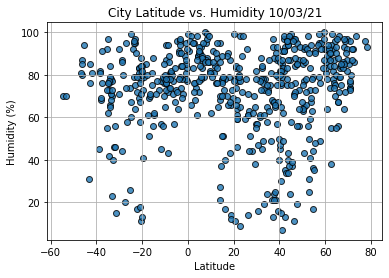

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

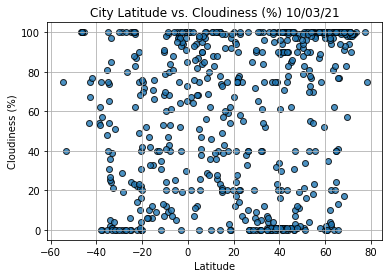

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

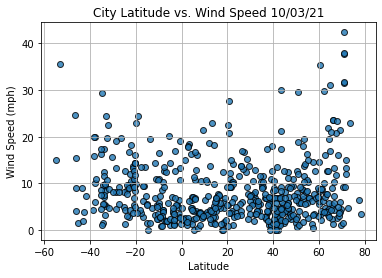

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
# looking for values at index 13
index13 = city_data_df.loc[13]
index13

City                Half Moon Bay
Country                        US
Date          2021-10-03 23:08:37
Lat                       37.4636
Lng                     -122.4286
Max Temp                    96.82
Humidity                       24
Cloudiness                      1
Wind Speed                   6.91
Name: 13, dtype: object

In [63]:
# getting either true or false for rwo that meet the criteria of >= latitude 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
558     True
559    False
560     True
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [64]:
#Filter city_data_df to show only cities with latitudes of >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-10-03 23:04:21,77.4840,-69.3632,28.09,96,100,6.40
1,Stephenville,US,2021-10-03 23:08:34,32.2207,-98.2023,82.53,45,40,6.91
2,Bilibino,RU,2021-10-03 23:08:34,68.0546,166.4372,19.18,93,91,2.66
4,Kapaa,US,2021-10-03 23:04:21,22.0752,-159.3190,78.19,79,90,4.00
5,Buraydah,SA,2021-10-03 23:06:23,26.3260,43.9750,79.74,14,10,5.91


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

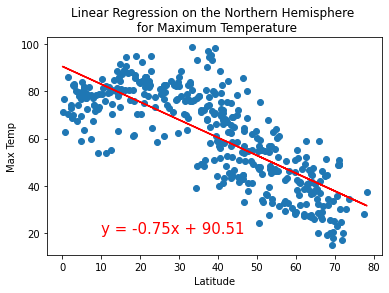

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

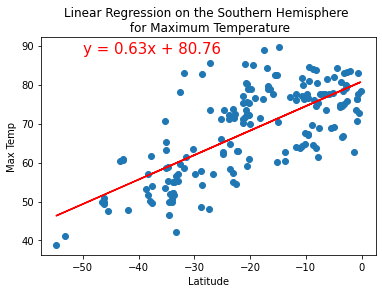

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,88))

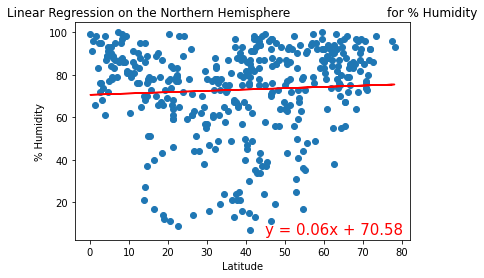

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

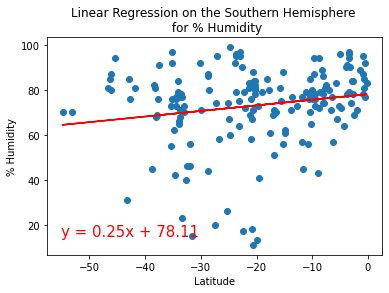

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,15))

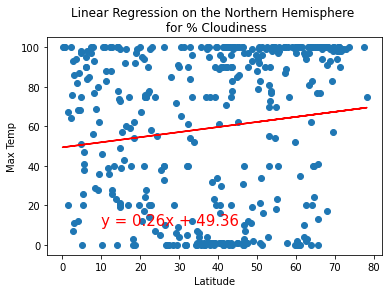

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Max Temp',(10,10))

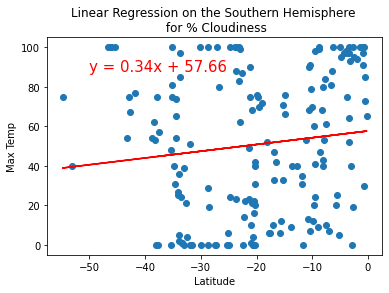

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Max Temp',(-50,88))

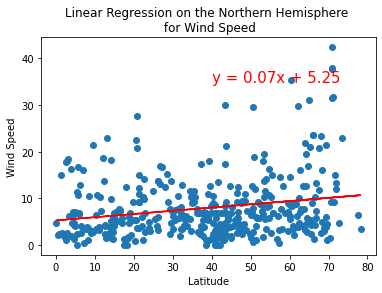

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

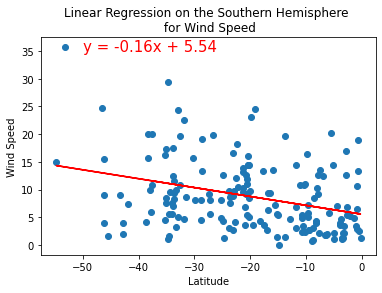

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))